## using Gradient descent

# Simple Linear regression

### First code

 simple and focused solely on the task of gradient descent for simple linear regression with one feature. It’s straightforward but not very flexible for expansion or reuse.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple linear dataset
def create_linear_dataset(n_samples=100):
    x = np.linspace(0, 10, n_samples)
    y = 3 * x + np.random.randn(n_samples) * 2  # Linear relationship with noise
    return x, y

# Generate a multiple linear regression dataset (2 features for simplicity)
def create_multiple_linear_dataset(n_samples=100):
    x1 = np.linspace(0, 10, n_samples)
    x2 = np.linspace(5, 15, n_samples)
    y = 2 * x1 + 3 * x2 + np.random.randn(n_samples) * 2  # Linear relationship with two features
    return np.column_stack([x1, x2]), y

# Generate a non-linear dataset (for polynomial regression)
def create_polynomial_dataset(n_samples=100):
    x = np.linspace(0, 10, n_samples)
    y = 0.5 * x**2 - 3 * x + 2 + np.random.randn(n_samples) * 3  # Quadratic relationship with noise
    return x, y


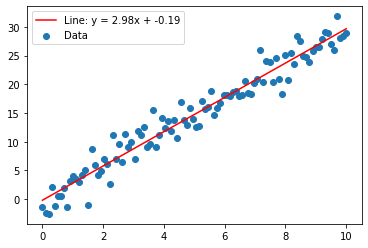

In [10]:
# Gradient Descent for Simple Linear Regression
def gradient_descent(x, y, learning_rate=0.01, m=1000):  # m is the number of iterations (epochs)
    n = len(y)
    w_0, w_1 = 0, 0  # Initialize parameters (bias and weight)
    for _ in range(m):
        y_pred = w_0 + w_1 * x
        d_w_0 = -(2/n) * np.sum(y - y_pred)  # Gradient for w_0 (bias)
        d_w_1 = -(2/n) * np.sum((y - y_pred) * x)  # Gradient for w_1 (weight)
        w_0 -= learning_rate * d_w_0  # Update bias
        w_1 -= learning_rate * d_w_1  # Update weight
    return w_0, w_1

# Visualization
x, y = create_linear_dataset()
w_0, w_1 = gradient_descent(x, y)
y_pred = w_0 + w_1 * x

plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color='r', label=f"Line: y = {w_1:.2f}x + {w_0:.2f}")
plt.legend()
plt.show()


In [11]:
# Use the learned parameters to make predictions
def predict(x, w_0, w_1):
    return w_0 + w_1 * x

x_new = np.array([2, 5, 7])
predictions = predict(x_new, w_0, w_1)
print(f"Predictions for {x_new}: {predictions}")

Predictions for [2 5 7]: [ 5.77803679 14.73239527 20.70196758]


## Second code

Second Code is more modular and flexible. It’s designed to be reusable and extensible to more complex models, such as multiple linear regression or polynomial regression. It separates the different tasks (cost calculation, gradient computation, and parameter updating), making the code more structured and easier to modify for other purposes.

Iteration    0: Cost 221587.00
Iteration  150: Cost    93.69
Iteration  300: Cost    56.40
Iteration  450: Cost    33.95
Iteration  600: Cost    20.44
Iteration  750: Cost    12.30
Iteration  900: Cost     7.40
Iteration 1050: Cost     4.46
Iteration 1200: Cost     2.68
Iteration 1350: Cost     1.62
w,b found by gradient descent: 200.91, 96.73
Predictions for [2 5 7]: [ 498.53968151 1101.2602357  1503.07393849]


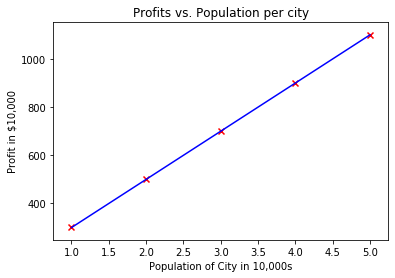

For population = 35,000, we predict a profit of $7998999.59
For population = 70,000, we predict a profit of $15030739.38


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

# Define cost function
def compute_cost(x, y, w, b):
    m = len(x)
    total_cost = 0
    for i in range(m):
        total_cost += (w * x[i] + b - y[i]) ** 2
    return total_cost / (2 * m)

# Define gradient function
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        error = (w * x[i] + b) - y[i]
        dj_dw += error * x[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

# BATCH Gradient Descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
    
    return w, b, J_history, w_history

# Use the learned parameters to make predictions
def predict(x, w, b):
    return w * x + b

# Example data
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([300, 500, 700, 900, 1100])

# Initialize fitting parameters
initial_w = 0.0
initial_b = 0.0

# Gradient descent settings
iterations = 1500
alpha = 0.01

# Perform gradient descent
w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"w,b found by gradient descent: {w:.2f}, {b:.2f}")

# New data points to predict
x_new = np.array([2, 5, 7])
predictions = predict(x_new, w, b)
print(f"Predictions for {x_new}: {predictions}")

# Plot the linear fit
m = x_train.shape[0]
predicted_train = predict(x_train, w, b)

# Plot the linear fit
plt.plot(x_train, predicted_train, c="b")
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

# Example predictions for 35,000 and 70,000 population
predict1 = predict(np.array([3.5]), w, b)
print(f'For population = 35,000, we predict a profit of ${predict1[0] * 10000:.2f}')

predict2 = predict(np.array([7.0]), w, b)
print(f'For population = 70,000, we predict a profit of ${predict2[0] * 10000:.2f}')


# Multiple and Polynomial Regression

Iteration 0, Cost: 14190.65
Iteration 1000, Cost: 4.2163248868959595
Iteration 2000, Cost: 3.2373405777626587
Iteration 3000, Cost: 2.4856657266768347
Iteration 4000, Cost: 1.9085215028706883
Iteration 5000, Cost: 1.4653838156225052
Iteration 6000, Cost: 1.1251378220567516
Iteration 7000, Cost: 0.8638932033549306
Iteration 8000, Cost: 0.663306709784753
Iteration 9000, Cost: 0.509294192310836


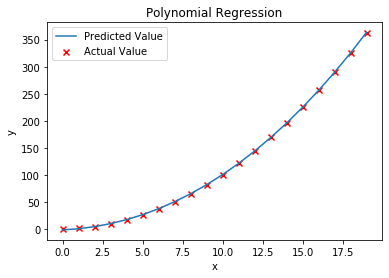

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create the dataset
x = np.arange(0, 20, 1)
y = 1 + x**2

# 2. Manually create polynomial features
X = np.c_[x, x**2, x**3]

# 3. Normalize the features
def zscore_normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_normalized = zscore_normalize_features(X)

# 4. Gradient Descent Implementation
def run_gradient_descent(X, y, iterations, alpha):
    m = len(y)
    w = np.zeros(X.shape[1])
    b = 0
    cost_history = []
    
    for i in range(iterations):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)
        
        w -= alpha * (1 / m) * np.dot(X.T, error)
        b -= alpha * (1 / m) * np.sum(error)
        
        if i % 1000 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return w, b, cost_history

# Run gradient descent
iterations = 10000
alpha = 1e-1
w, b, cost_history = run_gradient_descent(X_normalized, y, iterations, alpha)

# 5. Plot the results
plt.scatter(x, y, marker='x', color='r', label="Actual Value")
plt.plot(x, np.dot(X_normalized, w) + b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


Other Examples

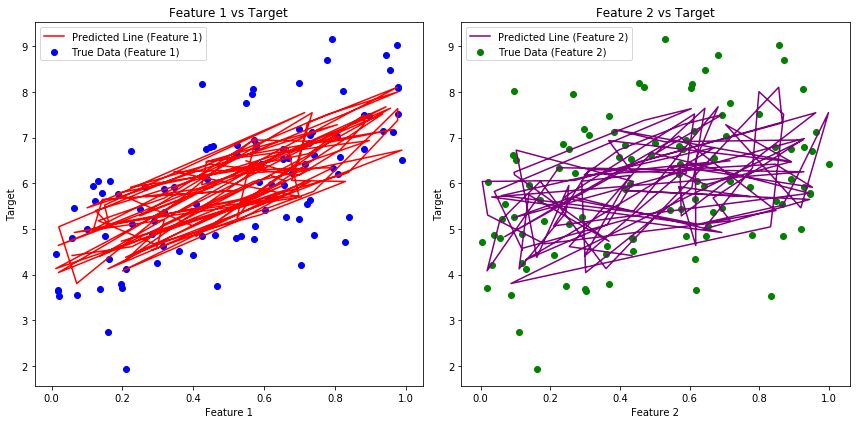

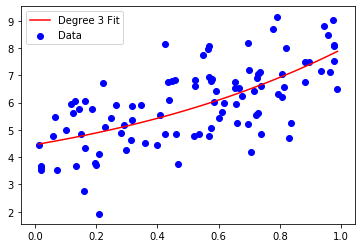

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent for Multiple Linear Regression (Vectorized)
def gradient_descent_multi(X, y, learning_rate=0.01, m=1000):
    n = len(y)  # Number of samples
    p = X.shape[1]  # Number of features (including bias term)
    
    w = np.zeros(p)  # Initialize parameters (weights)
    
    for _ in range(m):
        y_pred = np.dot(X, w)  # Prediction using current weights
        gradient = -(2/n) * np.dot(X.T, (y - y_pred))  # Vectorized gradient calculation
        w -= learning_rate * gradient  # Update weights
    return w

# Helper function to add bias term to feature matrix X
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones (bias term)

# Prediction function
def predict(X_new, w):
    X_new_bias = add_bias(X_new)  # Add bias term to new data
    return np.dot(X_new_bias, w)  # Calculate predictions

# Multiple Linear Regression Example
def create_multiple_linear_dataset(n=100):
    np.random.seed(0)
    X = np.random.rand(n, 2)  # 2 features
    y = 3 + 4 * X[:, 0] + 2 * X[:, 1] + np.random.randn(n)  # True relation with some noise
    return X, y

# Polynomial Features Expansion (for Polynomial Regression)
def polynomial_features(X, degree):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

# Visualization for Multiple Linear Regression (separate plot for each feature)
def visualize_multiple_regression(X, y, w):
    # Predictions
    y_pred = np.dot(add_bias(X), w)  # Predicted values using learned weights
    
    # Plot for Feature 1
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], y, color="blue", label="True Data (Feature 1)")
    plt.plot(X[:, 0], y_pred, color="red", label="Predicted Line (Feature 1)")
    plt.title("Feature 1 vs Target")
    plt.xlabel("Feature 1")
    plt.ylabel("Target")
    plt.legend()
    
    # Plot for Feature 2
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 1], y, color="green", label="True Data (Feature 2)")
    plt.plot(X[:, 1], y_pred, color="purple", label="Predicted Line (Feature 2)")
    plt.title("Feature 2 vs Target")
    plt.xlabel("Feature 2")
    plt.ylabel("Target")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Visualization for Polynomial Regression
def visualize_polynomial_regression(X, y, w, degree):
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    poly_X = polynomial_features(x_range, degree)
    y_pred = np.dot(poly_X, w)  # Polynomial regression prediction
    
    plt.scatter(X, y, label="Data", color="blue")
    plt.plot(x_range, y_pred, label=f"Degree {degree} Fit", color="red")
    plt.legend()
    plt.show()

# Example usage for Multiple Linear Regression
X_multi, y_multi = create_multiple_linear_dataset()  # Create dataset
X_multi_bias = add_bias(X_multi)  # Add bias term
w_multi = gradient_descent_multi(X_multi_bias, y_multi)  # Perform gradient descent
visualize_multiple_regression(X_multi, y_multi, w_multi)  # Visualize the results


# Polynomial Regression (Degree 3 Example)
X_poly, y_poly = create_multiple_linear_dataset(n=100)
X_poly_1d = X_poly[:, 0].reshape(-1, 1)  # Use only the first feature for visualization
X_poly_transformed = polynomial_features(X_poly_1d, degree=3)  # Create polynomial features
w_poly = gradient_descent_multi(X_poly_transformed, y_poly)  # Perform gradient descent for poly regression
visualize_polynomial_regression(X_poly_1d, y_poly, w_poly, degree=3)  # Visualize polynomial regression


In [18]:
X_new = np.array([[0.5, 0.5], [1.5, 2.0], [2.0, 2.5]])  # New data points
predictions = predict(X_new, w_multi)  # Make predictions
print(f"Predictions for new data points {X_new}: {predictions}")

Predictions for new data points [[0.5 0.5]
 [1.5 2. ]
 [2.  2.5]]: [ 5.9348106  11.91187565 14.42994018]


Iteration 0, Cost: 14190.65
Iteration 1000, Cost: 4.2163248868959595
Iteration 2000, Cost: 3.2373405777626587
Iteration 3000, Cost: 2.4856657266768347
Iteration 4000, Cost: 1.9085215028706883
Iteration 5000, Cost: 1.4653838156225052
Iteration 6000, Cost: 1.1251378220567516
Iteration 7000, Cost: 0.8638932033549306
Iteration 8000, Cost: 0.663306709784753
Iteration 9000, Cost: 0.509294192310836


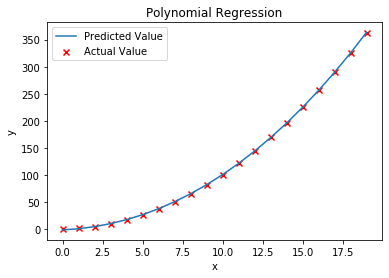